![image.png](attachment:image.png)

![image.png](attachment:image.png)

Para ejercitarte y afianzar lo aprendido sobre **Transfer Learning y Fine-tuning**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
!pip install tensorflow

In [2]:
!pip install -U tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 55.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 w

In [3]:
!pip install opencv-python-headless


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.io import imread
import cv2
from keras import layers
from tensorflow.keras import Model
from keras.optimizers import Adam

## Apple 360

En este conjunto de ejercicios vas a montar un clasificador de manzanas mediante un dataset de imágenes. El dataset se compone de 13 tipos diferentes con aproximadamente unas 200 imágenes por cada tipo. Tendrás que montar un modelo de deep learning que utilice **transfer learning**. Se sugiere empezar con una red ResNet50 con imagenet.

El dataset original proviene del [concurso de Kaggle Fruits 360](https://www.kaggle.com/moltean/fruits), pero adaptado para la clasificación de una menor cantidad de casos (sólo las manzanas).


### Ejercicio 1

Crea los juegos de X,y para train y test a partir de los datos teninendo en cuenta su distribución, para ello tendrás que explorar las estructura. Crea un juego Train,test para resolución 32x32 y un juego de test adicional para 224x224. Es decir tendras que tener un X_train, X_test para 32x32 y un X_test adicional a 224x224

In [5]:
ROOT_PATH = '/content/frutas/data/apples/'
TRAIN_PATH = ROOT_PATH + "Train/"
TEST_PATH = ROOT_PATH + "Test/"

In [6]:
def read_data(directorio, reshape_dim = (32,32)):
    X = []
    y = []
    for folder in os.listdir(directorio):
        if os.path.isdir('/'.join([directorio, folder])):
            for file in os.listdir('/'.join([directorio, folder])):

                image = imread('/'.join([directorio, folder, file]))
                image = cv2.resize(image, reshape_dim) # Redimensionamos las imágenes a 32x32
                nombre = folder

                X.append(image)
                y.append(nombre)

    return np.array(X),np.array(y)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import zipfile
import os

# Ruta al archivo ZIP en Google Drive
zip_path = "/content/drive/MyDrive/data.zip"  # Cambia esto si tu zip está en otra carpeta

# Carpeta de destino donde se descomprimirá
extract_path = "/content/frutas"

# Descomprimir
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ ¡Fotos descomprimidas en:", extract_path)


✅ ¡Fotos descomprimidas en: /content/frutas


In [9]:
X_train, y_train = read_data(TRAIN_PATH)

In [10]:
X_test, y_test = read_data(TEST_PATH)

In [11]:

X_test_224, y_test_224 = read_data(TEST_PATH, reshape_dim=(224, 224))

In [12]:
print('train',X_train.shape)
print('train',y_train.shape)
print('test 32', X_test.shape)
print('test 32', y_test.shape)
print('test 224',X_test_224.shape)
print('test 224',y_test_224.shape)

train (6404, 32, 32, 3)
train (6404,)
test 32 (2134, 32, 32, 3)
test 32 (2134,)
test 224 (2134, 224, 224, 3)
test 224 (2134,)


**NOTA:** A partir de aquí emplea siempre el X_train, X_test de 32x32 salvo en el ejercicio que se te diga lo contrario.

### Ejercicio 2

Haz una visualización de algunos de los datos. Crea una función que te ayude con ello.

In [13]:
def imagenes_visual(imagen, labels, inicio, final):
    cantidad = final - inicio
    cols = 3
    filas = (cantidad + cols -1) // cols
    plt.figure(figsize=(10,10))
    for a,x in enumerate(range(inicio,final)):
        plt.subplot(filas, cols, a +1)
        plt.imshow(imagen[x], cmap = 'Greys')
        plt.title(labels[x])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

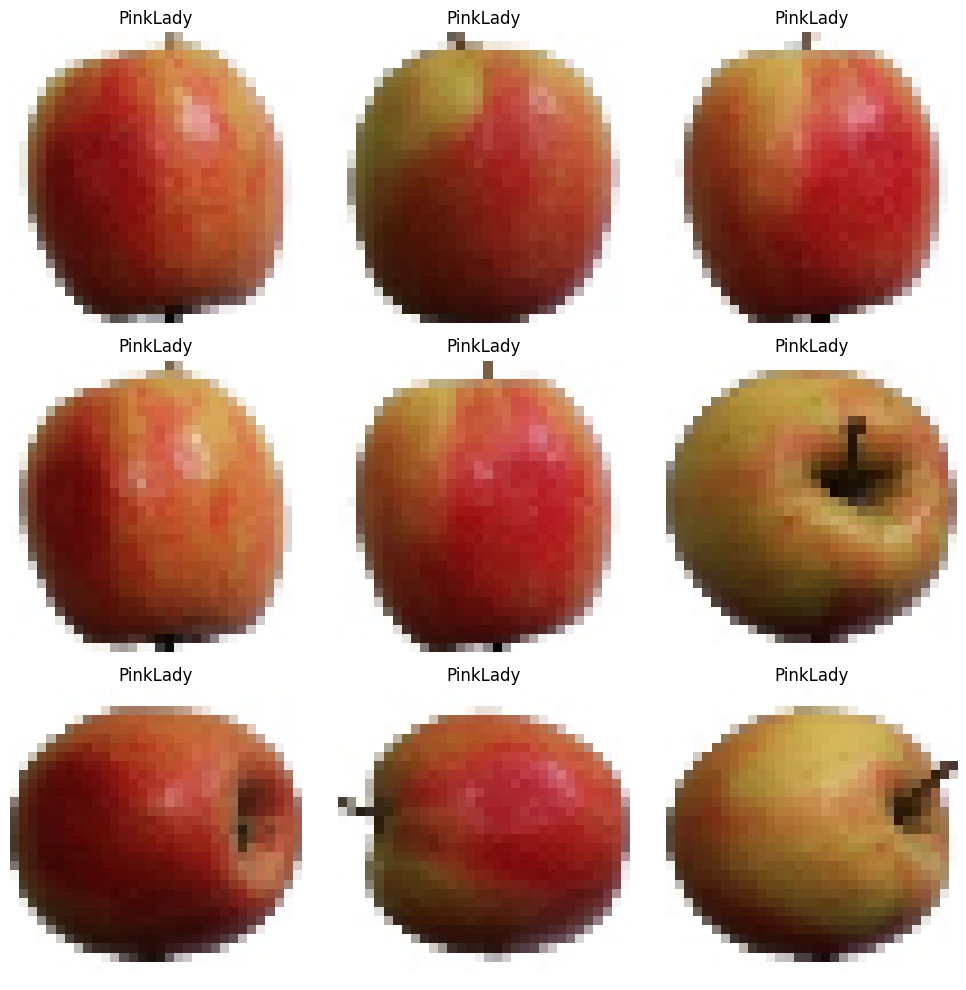

In [14]:
imagenes_visual(X_train, y_train, 255, 264)

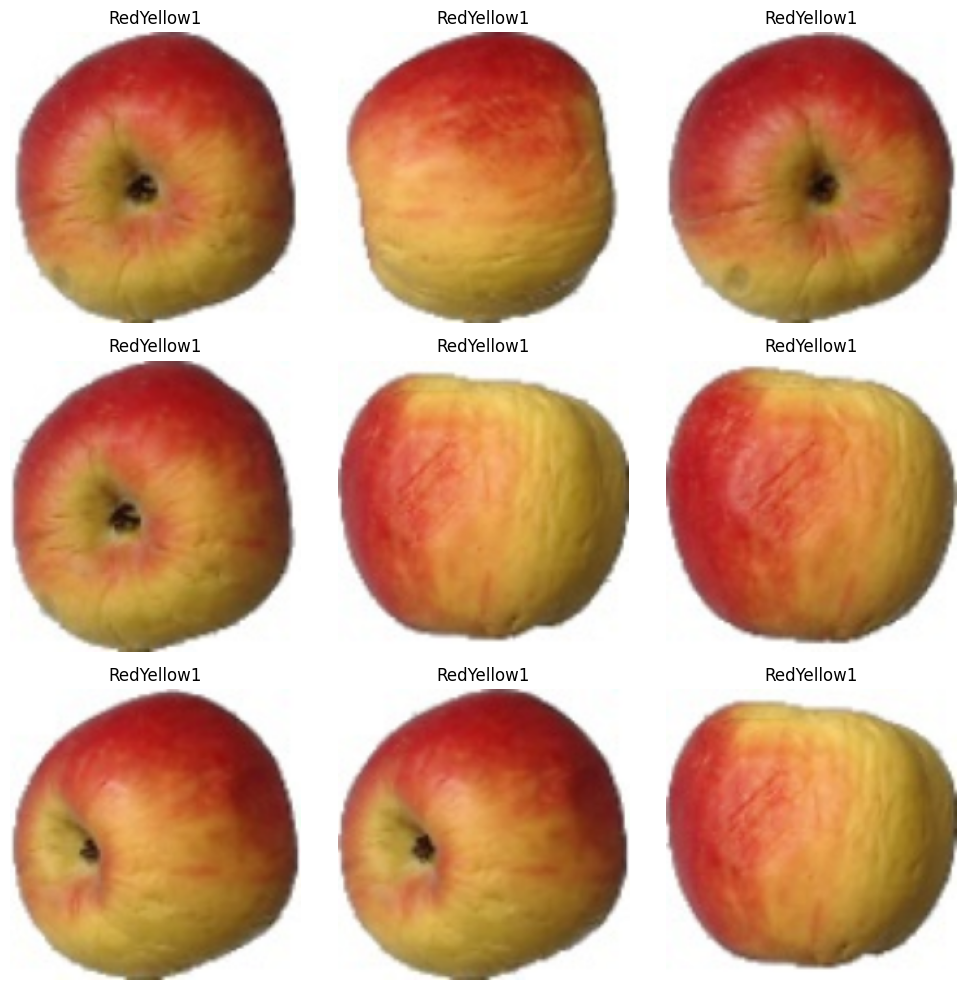

In [15]:
imagenes_visual(X_test_224, y_test_224, 255, 264)

### Ejercicio 3

Completa el miniEDA habitual con imágenes y escoge una métrica para el modelo.

In [16]:
target = pd.Series(y_train)

In [17]:
target.value_counts(True)

,proportion
RedYellow2,0.104934
GrannySmith,0.076827
RedYellow1,0.076827
Red2,0.076827
Braeburn,0.076827
Red1,0.076827
Golden2,0.076827
RedDelicious,0.076515
Golden3,0.075109
Golden1,0.074953


In [18]:
# voy a escoger la metrica 'accuracy', están todas valanceadas, menos la primera

### Ejercicio 4

Termina de transformar los datos si crees que es conveniente y aunque el entrenamiento de modelos de keras ya tiene un shuffling interno, haz un "barajado" del X_train (del X_test no es necesario) para facilitar la convergencia inicial del modelo. Utiliza la función shuffle de sklearn y asigna la salida a un X_train distinto (es decir no machaques el inicial)

In [19]:
from sklearn.utils import shuffle

In [20]:
X_train_ = X_train/255
X_test_ = X_test/255

In [21]:
X_train_shuffle, y_train_shuffle = shuffle(X_train_, y_train)

### Ejercicio 5

Sklearn permite trabajar con etiquetas textuales pero keras no. Transforma las etiquetas a numéricas, creando dos diccionarios uno que permita traducir de etiqueta a clase numérica y otro que permita la transformación inversa.

In [22]:
mapeo = {y:x for x,y in enumerate(pd.Series(np.unique(y_train)))}
mapeo

{'Braeburn': 0,
 'CrimsonSnow': 1,
 'Golden1': 2,
 'Golden2': 3,
 'Golden3': 4,
 'GrannySmith': 5,
 'PinkLady': 6,
 'Red1': 7,
 'Red2': 8,
 'Red3': 9,
 'RedDelicious': 10,
 'RedYellow1': 11,
 'RedYellow2': 12}

In [23]:
mapeo_inverso = {x:y for x,y in enumerate(pd.Series(np.unique(y_train)))}
mapeo_inverso

{0: 'Braeburn',
 1: 'CrimsonSnow',
 2: 'Golden1',
 3: 'Golden2',
 4: 'Golden3',
 5: 'GrannySmith',
 6: 'PinkLady',
 7: 'Red1',
 8: 'Red2',
 9: 'Red3',
 10: 'RedDelicious',
 11: 'RedYellow1',
 12: 'RedYellow2'}

In [24]:
y_train_m = pd.Series(y_train).map(mapeo)
y_test_m = pd.Series(y_test).map(mapeo)

In [25]:
y_test_224_m = pd.Series(y_test_224).map(mapeo)

In [26]:
y_train_shuffle_m = pd.Series(y_train_shuffle).map(mapeo)

In [27]:
y_train_m.value_counts()

,count
12,672
5,492
11,492
8,492
0,492
7,492
3,492
10,490
4,481
2,480


### Ejercicio 6: Zero Shot Learning

Descar el modelo ResNet50 preparado ya para poder usarlo directamente a la Zero Shot Learning. Pruébalo contra el test (aquí no valen nuestras categorías serán las que proporcione ResNet ojo). Prueba una selección aleatoria de imágenes del test y compara las etiquetas de ResNet con la que tiene. ¿Nos sirve este clasificador así tal cual?

In [28]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input

In [29]:
model = ResNet50V2(input_shape=(224, 224, 3),
                  include_top= True,
                  weights = 'imagenet',
                  classifier_activation='softmax')

102869336/102869336 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [30]:
model.summary()

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 58, 58,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 56, 56,    │          0 │ conv2_block1_0_c

 Total params: 25,613,800 (97.71 MB)

 Trainable params: 25,568,360 (97.54 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [31]:
pred = [np.argmax(predictions) for predictions in model.predict(X_test_224)]

67/67 ━━━━━━━━━━━━━━━━━━━━ 327s 5s/step


In [32]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [33]:
print(classification_report(y_test_224_m, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     164.0
           1       0.00      0.00      0.00     148.0
           2       0.00      0.00      0.00     160.0
           3       0.00      0.00      0.00     164.0
           4       0.00      0.00      0.00     161.0
           5       0.00      0.00      0.00     164.0
           6       0.00      0.00      0.00     152.0
           7       0.00      0.00      0.00     164.0
           8       0.00      0.00      0.00     164.0
           9       0.00      0.00      0.00     144.0
          10       0.00      0.00      0.00     166.0
          11       0.00      0.00      0.00     164.0
          12       0.00      0.00      0.00     219.0
         167       0.00      0.00      0.00       0.0
         284       0.00      0.00      0.00       0.0
         457       0.00      0.00      0.00       0.0
         927       0.00      0.00      0.00       0.0

    accuracy              

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

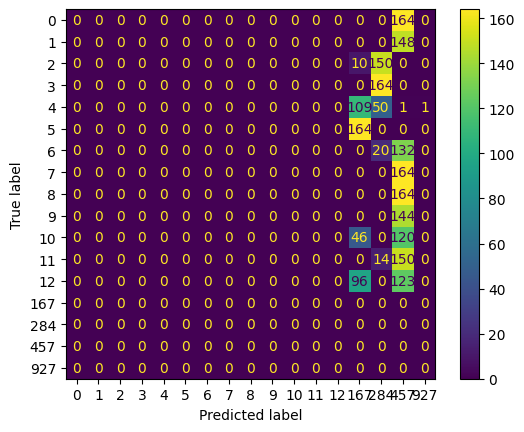

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test_224_m, pred)

In [35]:
# no clasifica nada bien

## Transfer Learning

### Ejercicio 7:

Carga la ResNet50 sin cabezas, crea un modelo con el anterior y una cabeza con dos capas densas, una oculta de 300 unidades (con activación "relu") y otra de salida con las unidades que crees necesarias y activación la que consideres. Congela las capas del modelo base (la ResNet50). Define también los hiperparámetros necesarios para compilar y compila el modelo y muestra un summary del mismo.

In [36]:
modelo = ResNet50V2(input_shape=(32, 32, 3),
                  include_top= False,
                  weights = 'imagenet',
                  classifier_activation='softmax')

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [37]:
for layer in modelo.layers:
    layer.trainable = False

In [38]:
import tensorflow as tf

In [39]:
x = layers.Flatten()(modelo.output)

x = layers.Dense(300, activation = 'relu')(x)

x = layers.Dropout(0.5)(x)

x = layers.Dense(13, activation='softmax')(x)

mod = tf.keras.models.Model(modelo.input, x)

mod.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['acc'])

In [40]:
mod.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38, 3) │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 8, 8, 64)  │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 8, 8, 64)  │          0 │ conv2_block1_pre… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 10, 10,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 8, 8, 256) │          0 │ conv2_block1_0_c

 Total params: 24,183,413 (92.25 MB)

 Trainable params: 618,613 (2.36 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

### Ejercicio 8

Entrena el modelo con nuestros datos de train y muestra la evolución del entrenamiento. Emplea un callback de Earlystopping con patience a 5. Termina de escoger el batch_size y el número de épocas.

In [41]:
y_train_shuffle_m

,0
0,5
1,11
2,10
3,7
4,8
...,...
6399,1
6400,0
6401,0
6402,12


In [42]:
from tensorflow import keras


In [43]:
history = mod.fit(X_train_shuffle, y_train_shuffle_m, batch_size = 32, epochs= 10, validation_split = 0.2,
                   callbacks=[keras.callbacks.EarlyStopping(patience=5, # las epocas que espera sin mejorar
                                             restore_best_weights=True)])# asi usan los pesos con el mejor 'val_loss'

Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 42s 207ms/step - acc: 0.5344 - loss: 1.5982 - val_acc: 0.9578 - val_loss: 0.1980
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 33s 155ms/step - acc: 0.9125 - loss: 0.2866 - val_acc: 0.9891 - val_loss: 0.0893
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 48s 197ms/step - acc: 0.9521 - loss: 0.1494 - val_acc: 0.9992 - val_loss: 0.0375
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 39s 187ms/step - acc: 0.9783 - loss: 0.0896 - val_acc: 0.9984 - val_loss: 0.0232
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 41s 188ms/step - acc: 0.9630 - loss: 0.1225 - val_acc: 0.9977 - val_loss: 0.0199
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 31s 193ms/step - acc: 0.9847 - loss: 0.0609 - val_acc: 0.9992 - val_loss: 0.0103
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 36s 163ms/step - acc: 0.9843 - loss: 0.0507 - val_acc: 0.9969 - val_loss: 0.0140
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 30s 189ms/step - acc: 0.9869 - loss: 0.0433 - val_acc: 0.9984 - val_loss: 0.0132
Epoch 9/10
161/161 ━━━━━━━━━━━━━

### Ejercicio 9

Evalua el modelo contra test y haz un pequeño análisis de las diferencias. Haz un clasification report y muestra la matriz de confusion. Haz un pequeño análisis de errores.

In [44]:
resultado = mod.evaluate(X_test_,y_test_m)

67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - acc: 0.9020 - loss: 0.3332


In [45]:
print(resultado)

[0.595443844795227, 0.833645761013031]


In [46]:
pred_2 = [np.argmax(predictions) for predictions in mod.predict(X_test_)]

67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 152ms/step


In [47]:
print(classification_report(y_test_m, pred_2))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       164
           1       0.88      0.86      0.87       148
           2       0.74      0.99      0.85       160
           3       0.97      0.92      0.95       164
           4       0.66      0.52      0.58       161
           5       0.94      0.79      0.86       164
           6       0.74      0.95      0.83       152
           7       1.00      0.62      0.76       164
           8       0.58      0.77      0.66       164
           9       0.99      0.62      0.76       144
          10       1.00      1.00      1.00       166
          11       0.76      0.99      0.86       164
          12       1.00      0.96      0.98       219

    accuracy                           0.83      2134
   macro avg       0.85      0.83      0.83      2134
weighted avg       0.85      0.83      0.83      2134



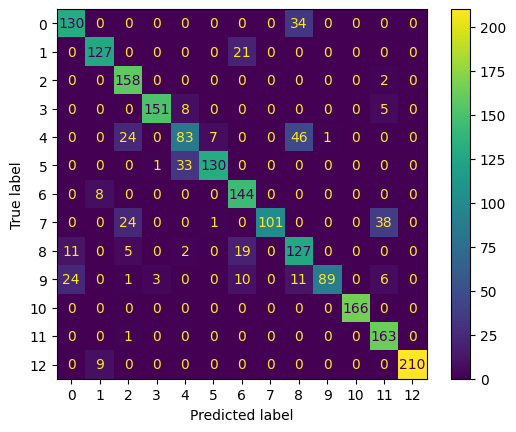

In [48]:
ConfusionMatrixDisplay.from_predictions(y_test_m, pred_2)

In [49]:
# por lo que veo va super bien, menos alguna pequeña confusion, tengo un accuracy del 86%

In [50]:
df_history = pd.DataFrame(history.history)

<Axes: >

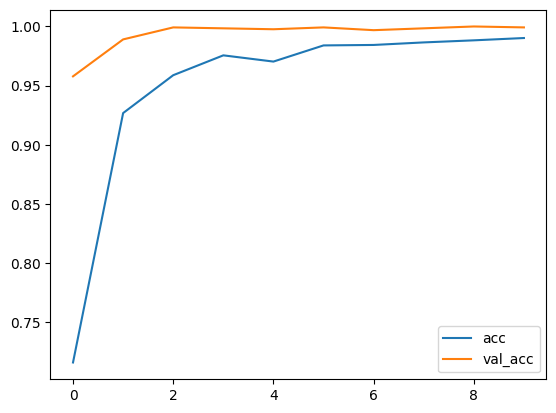

In [51]:
df_history[['acc','val_acc']].plot()

<Axes: >

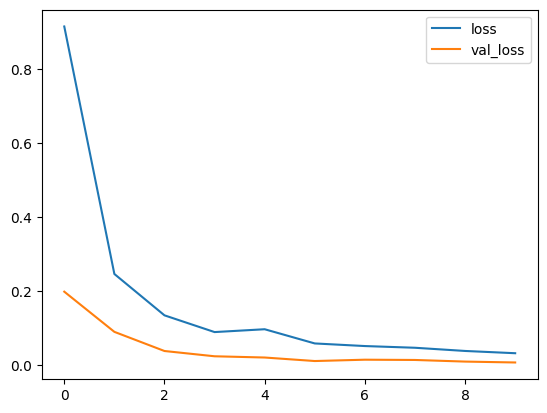

In [52]:
df_history[['loss','val_loss']].plot()

## Fine Tuning

### Ejercicio 10

Vuelve a descargar el modelo ResNet50 pero sin pesos entrenados, ni cabeza, crea el mismo modelo personalizado que en el ejercicio 7, compila y muestra el summary.

In [53]:
model_10 = ResNet50V2(input_shape=(32, 32, 3),
                  include_top= False,
                  weights = None,
                  classifier_activation='softmax')

In [54]:
x = layers.Flatten()(model_10.output)

x = layers.Dense(300, activation = 'relu')(x)

x = layers.Dropout(0.5)(x)

x = layers.Dense(13, activation='softmax')(x)

model_10 = tf.keras.models.Model(model_10.input, x)

model_10.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['acc'])

In [55]:
model_10.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38, 3) │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 8, 8, 64)  │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 8, 8, 64)  │          0 │ conv2_block1_pre… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 10, 10,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 8, 8, 256) │          0 │ conv2_block1_0_c

 Total params: 24,183,413 (92.25 MB)

 Trainable params: 24,137,973 (92.08 MB)

 Non-trainable params: 45,440 (177.50 KB)

### Ejercicio 11
Entrena con batch_size a 64 y 60 épocas, con un EarlyStopping de patience a 10 (ahora el entrenamiento es sensiblemente más largo, así que tómate un descanso). Muestra la evolución y da una posible justificación a emplear tantas épocas de partida.

In [56]:
entrenamiento_11 = model_10.fit(X_train_shuffle, y_train_shuffle_m, batch_size = 64, epochs= 60, validation_split = 0.2,
                   callbacks=[keras.callbacks.EarlyStopping(patience=10, # las epocas que espera sin mejorar
                                             restore_best_weights=True)])# asi usan los pesos con el mejor 'val_loss')

Epoch 1/60
81/81 ━━━━━━━━━━━━━━━━━━━━ 368s 4s/step - acc: 0.6406 - loss: 1.1386 - val_acc: 0.0742 - val_loss: 5.2494
Epoch 2/60
81/81 ━━━━━━━━━━━━━━━━━━━━ 377s 4s/step - acc: 0.8866 - loss: 0.3799 - val_acc: 0.0742 - val_loss: 8.5954
Epoch 3/60
81/81 ━━━━━━━━━━━━━━━━━━━━ 332s 4s/step - acc: 0.9394 - loss: 0.2069 - val_acc: 0.1249 - val_loss: 10.4415
Epoch 4/60
81/81 ━━━━━━━━━━━━━━━━━━━━ 327s 4s/step - acc: 0.8263 - loss: 0.5931 - val_acc: 0.2842 - val_loss: 6.1057
Epoch 5/60
81/81 ━━━━━━━━━━━━━━━━━━━━ 376s 4s/step - acc: 0.9450 - loss: 0.1702 - val_acc: 0.6854 - val_loss: 1.4414
Epoch 6/60
81/81 ━━━━━━━━━━━━━━━━━━━━ 315s 4s/step - acc: 0.9294 - loss: 0.2466 - val_acc: 0.6846 - val_loss: 1.2822
Epoch 7/60
81/81 ━━━━━━━━━━━━━━━━━━━━ 315s 4s/step - acc: 0.9516 - loss: 0.1777 - val_acc: 0.6745 - val_loss: 1.4890
Epoch 8/60
81/81 ━━━━━━━━━━━━━━━━━━━━ 332s 4s/step - acc: 0.9264 - loss: 0.2966 - val_acc: 0.4005 - val_loss: 5.0102
Epoch 9/60
81/81 ━━━━━━━━━━━━━━━━━━━━ 376s 4s/step - acc: 0.930

### Ejercicio 12

Muestra la evaluación contra el test, el informe de clasificación  y la matriz de confusión. Compara los resultados con los del ejercicio 9.

In [57]:
ej12 = model_10.evaluate(X_test_, y_test_m)
print(ej12)

67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - acc: 0.9910 - loss: 0.0475
[0.11395066231489182, 0.9746953845024109]


In [58]:
pred_3 = [np.argmax(predictions) for predictions in model_10.predict(X_test_)]

67/67 ━━━━━━━━━━━━━━━━━━━━ 16s 210ms/step


In [59]:
print(classification_report(y_test_m, pred_3))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       164
           1       1.00      1.00      1.00       148
           2       1.00      1.00      1.00       160
           3       1.00      1.00      1.00       164
           4       1.00      1.00      1.00       161
           5       1.00      1.00      1.00       164
           6       1.00      1.00      1.00       152
           7       1.00      0.82      0.90       164
           8       0.87      1.00      0.93       164
           9       0.83      1.00      0.91       144
          10       1.00      1.00      1.00       166
          11       1.00      1.00      1.00       164
          12       1.00      1.00      1.00       219

    accuracy                           0.97      2134
   macro avg       0.98      0.97      0.97      2134
weighted avg       0.98      0.97      0.97      2134



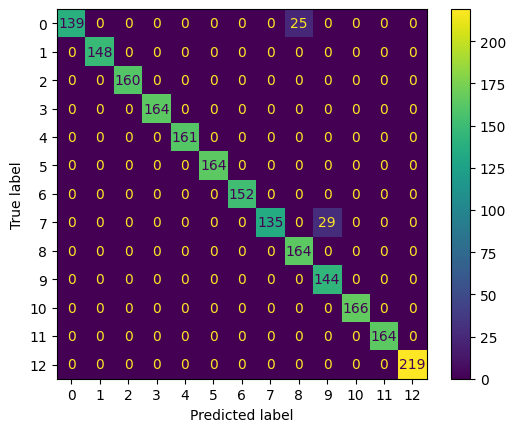

In [60]:
ConfusionMatrixDisplay.from_predictions(y_test_m, pred_3)

In [61]:
ej = pd.DataFrame(entrenamiento_11.history)

<Axes: >

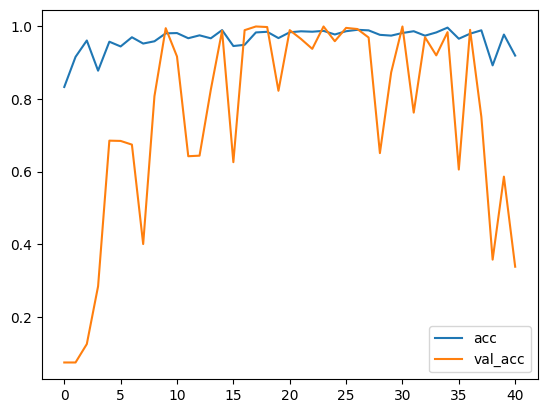

In [62]:
ej[['acc', 'val_acc']].plot()

<Axes: >

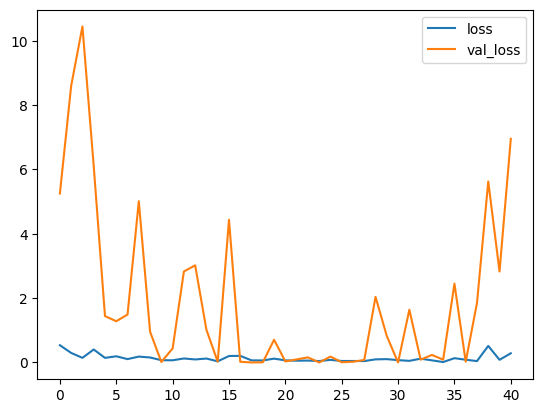

In [63]:
ej[['loss','val_loss']].plot()